In [10]:
cd D:\SciKitDatasets\misc

D:\SciKitDatasets\misc


In [11]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score

from sklearn import datasets

import pandas as pd

X = pd.read_csv('D:\\SciKitDatasets\\misc\\heart_train1.csv')
y = X.pop("num")

In [12]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000
mean,47.826531,0.724490,2.982993,132.540816,250.469388,0.068027,0.217687,139.132653,0.302721,0.586054,1.962585,0.0,5.965986
std,7.811812,0.447533,0.965117,17.611760,64.961034,0.252222,0.460257,23.549514,0.460219,0.908648,0.207277,0.0,0.501397
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000
25%,42.000000,0.000000,2.000000,120.000000,211.250000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,6.000000
50%,49.000000,1.000000,3.000000,130.000000,246.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,6.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000


In [13]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print ("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.8683259735046167


In [14]:
model.feature_importances_

array([0.06793406, 0.04260229, 0.12394942, 0.07045823, 0.12038461,
       0.0111521 , 0.01501663, 0.10803515, 0.24078948, 0.14596208,
       0.03069037, 0.        , 0.02302559])

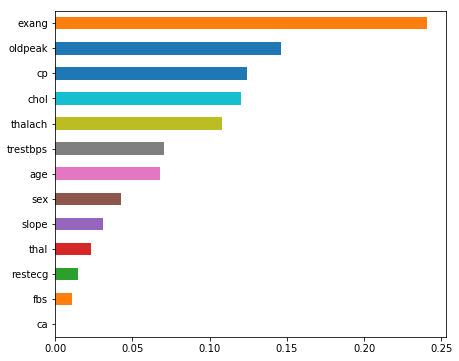

In [15]:
%matplotlib inline

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(axis=0, ascending=True, kind='quicksort', na_position='last', inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));